In [1]:
import numpy as np
import cv2

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the training image and labels

PATH = "D:/moneyFWD/archive/"

train_images = np.load(PATH+'k49-train-imgs.npz')['arr_0']


train_labels = np.load(PATH+'k49-train-labels.npz')['arr_0']

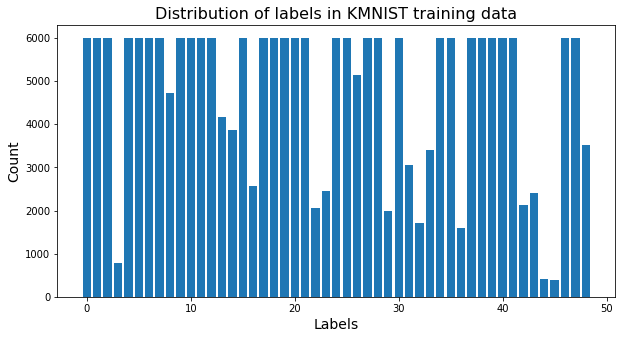

In [3]:
# Get the unique labels
labels = np.unique(train_labels)

# Get the frequency count for each label
frequency_count = np.bincount(train_labels)

# Visualize 
plt.figure(figsize=(10,5))
plt.bar(labels, frequency_count)
plt.title("Distribution of labels in KMNIST training data", fontsize=16)
plt.xlabel("Labels", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()


In [4]:
# read the testing image and labels

test_images = np.load(PATH+'k49-test-imgs.npz')['arr_0']
test_labels = np.load(PATH+'k49-test-labels.npz')['arr_0']

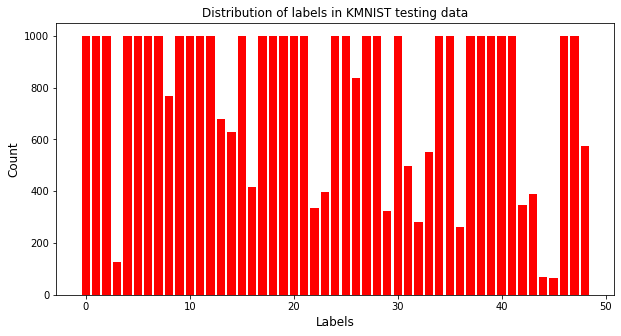

In [5]:
# Get the unique labels
labels = np.unique(test_labels)

# Get the frequency count for each label
frequency_count = np.bincount(test_labels)

# Visualize 
plt.figure(figsize=(10,5))
plt.bar(labels, frequency_count,color='red')
plt.title("Distribution of labels in KMNIST testing data", fontsize=12)
plt.xlabel("Labels", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


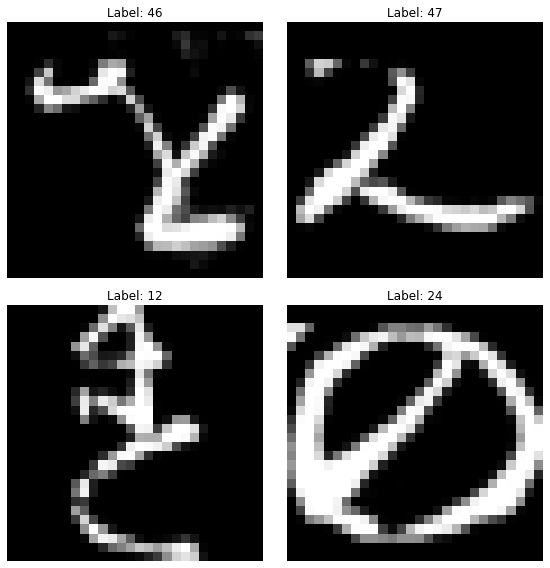

In [6]:
# Set the random seed for reproducibility
np.random.seed(42)

# Randomly select four samples and their labels
random_indices = np.random.choice(len(train_images), size=4, replace=False)
random_data = [train_images[i] for i in random_indices]
random_labels = [train_labels[i] for i in random_indices]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# Display the randomly selected samples with labels in subplots
for i, (sample, label) in enumerate(zip(random_data, random_labels)):
    ax = axes[i // 2, i % 2]
    ax.imshow(sample, cmap='gray')
    ax.set_title("Label: {}".format(label))
    ax.axis('off')

plt.tight_layout()
plt.show()


C:\Users\SABARI\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\SABARI\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\SABARI\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\SABARI\Anacon

C:\Users\SABARI\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\SABARI\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\SABARI\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\SABARI\Anacon

C:\Users\SABARI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 12354 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\SABARI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 12356 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\SABARI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 12358 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\SABARI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 12360 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\SABARI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 12362 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\SABARI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 12363 missing from curre

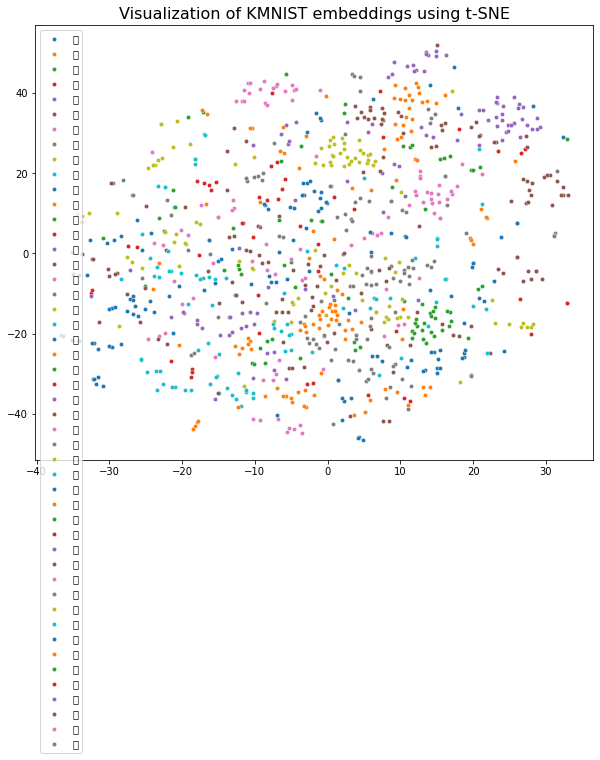

In [7]:
import seaborn as sns
from sklearn.manifold import TSNE
seed = 3612

# Labels mapping
label_mapping = {
    0: u"\u3042", 1: u"\u3044", 2: u"\u3046", 3: u"\u3048", 4: u"\u304a",
    5: u"\u304b", 6: u"\u304d", 7: u"\u304f", 8: u"\u3051", 9: u"\u3053",
    10: u"\u3055", 11: u"\u3057", 12: u"\u3059", 13: u"\u305b", 14: u"\u305d",
    15: u"\u305f", 16: u"\u3061", 17: u"\u3064", 18: u"\u3066", 19: u"\u3068",
    20: u"\u306a", 21: u"\u306b", 22: u"\u306c", 23: u"\u306d", 24: u"\u306e",
    25: u"\u306f", 26: u"\u3072", 27: u"\u3075", 28: u"\u3078", 29: u"\u307b",
    30: u"\u307e", 31: u"\u307f", 32: u"\u3080", 33: u"\u3081", 34: u"\u3082",
    35: u"\u3084", 36: u"\u3086", 37: u"\u3088", 38: u"\u3089", 39: u"\u308a",
    40: u"\u308b", 41: u"\u308c", 42: u"\u308d", 43: u"\u308f", 44: u"\u3090",
    45: u"\u3091", 46: u"\u3092", 47: u"\u3093", 48: u"\u309D"
}


# A function to get randomly sampled data
def get_random_samples(num_samples):
    # Choose indices randomly
    random_indices = np.random.choice(len(train_images), size=num_samples, replace=False)

    # Get the data corresponding to these indices
    random_train_images = train_images[random_indices].astype(np.float32)
    random_train_images /= 255.
    random_train_images = random_train_images.reshape(num_samples, 28*28)
    random_train_labels = train_labels[random_indices]
    unique_labels = np.unique(random_train_labels)
    return random_indices, random_train_images, random_train_labels, unique_labels

# Get randomly sampled data
num_samples = 1000
sample_indices, sample_images, sample_labels, unique_labels = get_random_samples(num_samples)

# Get the actual label names from the label mapping
label_names = [label_mapping[label] for label in unique_labels]

# Create a t-SNE instance
tsne = TSNE(n_components=2, random_state=seed, perplexity=30)

# Fit t-SNE to the data
sample_2D = tsne.fit_transform(sample_images)

fig = plt.figure(figsize=(10, 8))

for label, name in zip(unique_labels, label_names):
    sns.scatterplot(sample_2D[sample_labels == label, 0],
                    sample_2D[sample_labels == label, 1],
                    label=name, s=18)

plt.title("Visualization of KMNIST embeddings using t-SNE", fontsize=16)
plt.legend()
plt.show()
